In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../../data/fuel-econ.csv')
print(df.shape)
df.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [3]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars'] # ordered by size
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df['VClass'] = df['VClass'].astype(vclasses)
df['VClass'].dtype

CategoricalDtype(categories=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars',
                  'Midsize Cars', 'Large Cars'],
, ordered=True)

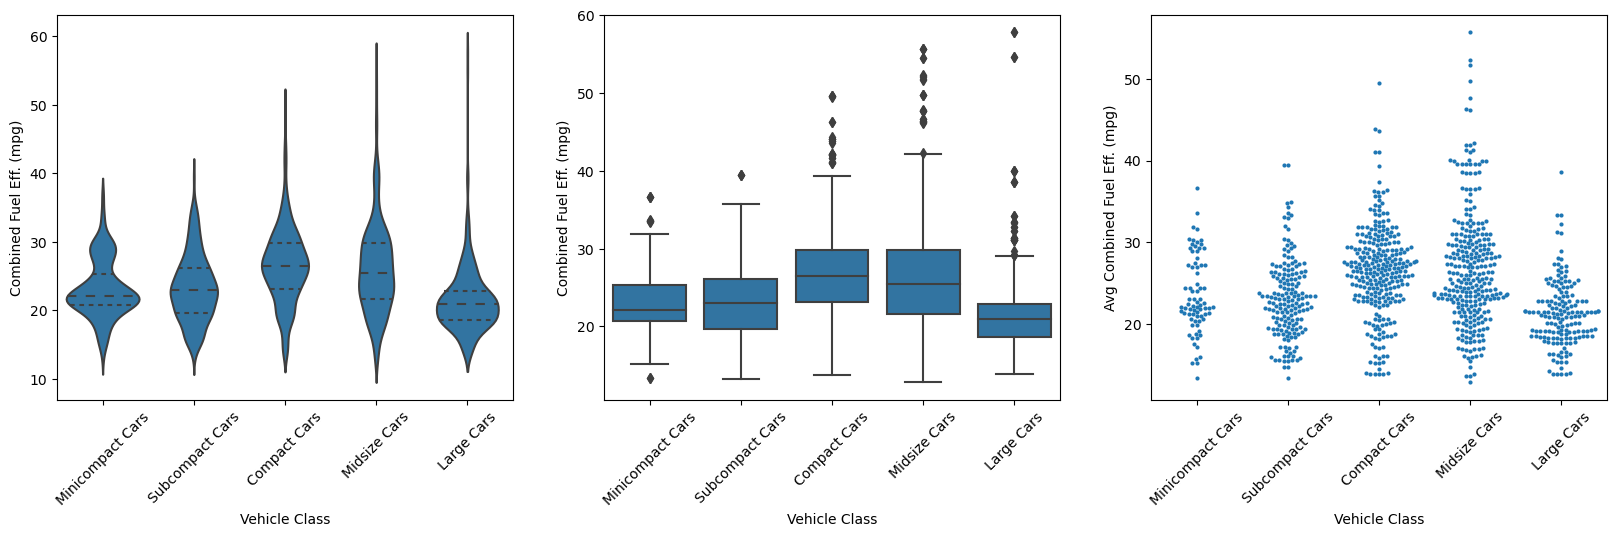

In [14]:
plt.figure(figsize=(20, 5))
base_color = sns.color_palette()[0]

# Left plot: violin plot
plt.subplot(1, 3, 1)
sns.violinplot(data=df, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=45)
plt.xlabel('Vehicle Class')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Center plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=45)
plt.xlabel('Vehicle Class')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Right plot: adapted bar chart
plt.subplot(1, 3, 3)
df_sub = df.sample(int(df.shape[0]*.25)) # take a random sample, to make plotting faster and to reduce crowding of points
sns.swarmplot(data=df_sub, x='VClass', y='comb', color=base_color, size=3)
plt.xticks(rotation=45)
plt.xlabel('Vehicle Class')
plt.ylabel('Avg Combined Fuel Eff. (mpg)');